# Electrical Distribution Network Energy Consumption Forecasting based upon Victorian MRIM Meter Data

## Objective:
This notebook will provide evaluations of each model used to forecast the energy consumption from CitiPower. In addition, conclusions and further work are also mentioned in this notebook.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing results from each model

In [2]:
results_ARIMA = pd.read_csv('results_ARIMA.csv')
results_LSTM = pd.read_csv('results_LSTM.csv')
results_Prophet = pd.read_csv('results_Prophet.csv')
results_SARIMA = pd.read_csv('results_SARIMA.csv')


In [3]:
print(results_ARIMA.columns)
print(results_LSTM.columns)
print(results_Prophet.columns)
print(results_SARIMA.columns)

Index(['SETTD', 'Actual', 'ARIMA', 'ARIMA (Walk-Forward)'], dtype='object')
Index(['Unnamed: 0', 'Actual', 'LSTM'], dtype='object')
Index(['ds', 'Actual', 'Prophet', 'Prophet (Walk-Forward)'], dtype='object')
Index(['Unnamed: 0', 'Actual', 'SARIMA (weekly)', 'SARIMA (Yearly)', 'SARIMAX',
       'SARIMAX (Walk-Forward)'],
      dtype='object')


### ARIMA Results

In [4]:
results_ARIMA.head()

,SETTD,Actual,ARIMA,ARIMA (Walk-Forward)
0,2019-01-01,3858957.991,4.373397e+06,4.373397e+06
1,2019-01-02,4264155.819,4.596834e+06,4.170141e+06
2,2019-01-03,4690920.697,4.781742e+06,4.505632e+06
3,2019-01-04,5841792.852,4.934764e+06,4.858990e+06
4,2019-01-05,3913922.670,5.061398e+06,5.811564e+06


In [5]:
results_ARIMA.dtypes

SETTD                    object
Actual                  float64
ARIMA                   float64
ARIMA (Walk-Forward)    float64
dtype: object

In [6]:
results_ARIMA['SETTD'] = pd.to_datetime(results_ARIMA['SETTD'])
results_ARIMA.set_index('SETTD',inplace = True)
results_ARIMA.head()

,Actual,ARIMA,ARIMA (Walk-Forward)
SETTD,,,
2019-01-01,3858957.991,4.373397e+06,4.373397e+06
2019-01-02,4264155.819,4.596834e+06,4.170141e+06
2019-01-03,4690920.697,4.781742e+06,4.505632e+06
2019-01-04,5841792.852,4.934764e+06,4.858990e+06
2019-01-05,3913922.670,5.061398e+06,5.811564e+06


### LSTM Results

In [7]:
results_LSTM.head()

,Unnamed: 0,Actual,LSTM
0,0,3858957.991,4.515832e+06
1,1,4264155.819,4.406280e+06
2,2,4690920.697,4.721521e+06
3,3,5841792.852,4.815758e+06
4,4,3913922.670,5.420984e+06


In [8]:
results_LSTM['SETTD'] = results_ARIMA.index
results_LSTM.drop('Unnamed: 0', axis = 1, inplace = True)
results_LSTM.set_index('SETTD',inplace = True)
results_LSTM.head()

,Actual,LSTM
SETTD,,
2019-01-01,3858957.991,4.515832e+06
2019-01-02,4264155.819,4.406280e+06
2019-01-03,4690920.697,4.721521e+06
2019-01-04,5841792.852,4.815758e+06
2019-01-05,3913922.670,5.420984e+06


### Prophet Results

In [9]:
results_Prophet.head()

,ds,Actual,Prophet,Prophet (Walk-Forward)
0,2019-01-01,3858957.991,4.740456e+06,4.740456e+06
1,2019-01-02,4264155.819,4.833124e+06,4.804445e+06
2,2019-01-03,4690920.697,4.897447e+06,4.845823e+06
3,2019-01-04,5841792.852,4.799631e+06,4.744902e+06
4,2019-01-05,3913922.670,4.223620e+06,4.213499e+06


In [10]:
results_Prophet['SETTD'] = results_ARIMA.index
results_Prophet.drop('ds', axis = 1, inplace = True)
results_Prophet.set_index('SETTD',inplace = True)
results_Prophet.head()

,Actual,Prophet,Prophet (Walk-Forward)
SETTD,,,
2019-01-01,3858957.991,4.740456e+06,4.740456e+06
2019-01-02,4264155.819,4.833124e+06,4.804445e+06
2019-01-03,4690920.697,4.897447e+06,4.845823e+06
2019-01-04,5841792.852,4.799631e+06,4.744902e+06
2019-01-05,3913922.670,4.223620e+06,4.213499e+06


### SARIMA Results

In [11]:
results_SARIMA.head()

,Unnamed: 0,Actual,SARIMA (weekly),SARIMA (Yearly),SARIMAX,SARIMAX (Walk-Forward)
0,2019-01-01,3858957.991,4.341858e+06,3.974896e+06,4.518188e+06,4.518188e+06
1,2019-01-02,4264155.819,4.587022e+06,4.323976e+06,4.861791e+06,4.415858e+06
2,2019-01-03,4690920.697,4.789656e+06,4.246831e+06,5.126768e+06,4.724773e+06
3,2019-01-04,5841792.852,4.806033e+06,4.383170e+06,5.170638e+06,4.877707e+06
4,2019-01-05,3913922.670,4.292207e+06,4.879140e+06,4.601621e+06,5.045530e+06


In [12]:
results_SARIMA['SETTD'] = results_ARIMA.index
results_SARIMA.drop('Unnamed: 0', axis = 1, inplace = True)
results_SARIMA.set_index('SETTD',inplace = True)
results_SARIMA.head()

,Actual,SARIMA (weekly),SARIMA (Yearly),SARIMAX,SARIMAX (Walk-Forward)
SETTD,,,,,
2019-01-01,3858957.991,4.341858e+06,3.974896e+06,4.518188e+06,4.518188e+06
2019-01-02,4264155.819,4.587022e+06,4.323976e+06,4.861791e+06,4.415858e+06
2019-01-03,4690920.697,4.789656e+06,4.246831e+06,5.126768e+06,4.724773e+06
2019-01-04,5841792.852,4.806033e+06,4.383170e+06,5.170638e+06,4.877707e+06
2019-01-05,3913922.670,4.292207e+06,4.879140e+06,4.601621e+06,5.045530e+06


### Set everything into ONE table

In [13]:
results = pd.concat([results_ARIMA, results_SARIMA, results_Prophet, results_LSTM], axis = 1)

In [14]:
results.drop('Actual', axis = 1, inplace = True)
results['Actual'] = results_ARIMA['Actual']
results.head()

,ARIMA,ARIMA (Walk-Forward),SARIMA (weekly),SARIMA (Yearly),SARIMAX,SARIMAX (Walk-Forward),Prophet,Prophet (Walk-Forward),LSTM,Actual
SETTD,,,,,,,,,,
2019-01-01,4.373397e+06,4.373397e+06,4.341858e+06,3.974896e+06,4.518188e+06,4.518188e+06,4.740456e+06,4.740456e+06,4.515832e+06,3858957.991
2019-01-02,4.596834e+06,4.170141e+06,4.587022e+06,4.323976e+06,4.861791e+06,4.415858e+06,4.833124e+06,4.804445e+06,4.406280e+06,4264155.819
2019-01-03,4.781742e+06,4.505632e+06,4.789656e+06,4.246831e+06,5.126768e+06,4.724773e+06,4.897447e+06,4.845823e+06,4.721521e+06,4690920.697
2019-01-04,4.934764e+06,4.858990e+06,4.806033e+06,4.383170e+06,5.170638e+06,4.877707e+06,4.799631e+06,4.744902e+06,4.815758e+06,5841792.852
2019-01-05,5.061398e+06,5.811564e+06,4.292207e+06,4.879140e+06,4.601621e+06,5.045530e+06,4.223620e+06,4.213499e+06,5.420984e+06,3913922.670


In [15]:
results.columns

Index(['ARIMA', 'ARIMA (Walk-Forward)', 'SARIMA (weekly)', 'SARIMA (Yearly)',
       'SARIMAX', 'SARIMAX (Walk-Forward)', 'Prophet',
       'Prophet (Walk-Forward)', 'LSTM', 'Actual'],
      dtype='object')

In [16]:
predictions = results.columns[0:-1]

In [17]:
print(predictions)

Index(['ARIMA', 'ARIMA (Walk-Forward)', 'SARIMA (weekly)', 'SARIMA (Yearly)',
       'SARIMAX', 'SARIMAX (Walk-Forward)', 'Prophet',
       'Prophet (Walk-Forward)', 'LSTM'],
      dtype='object')


### Predictions (Orange) vs Actual (Blue)

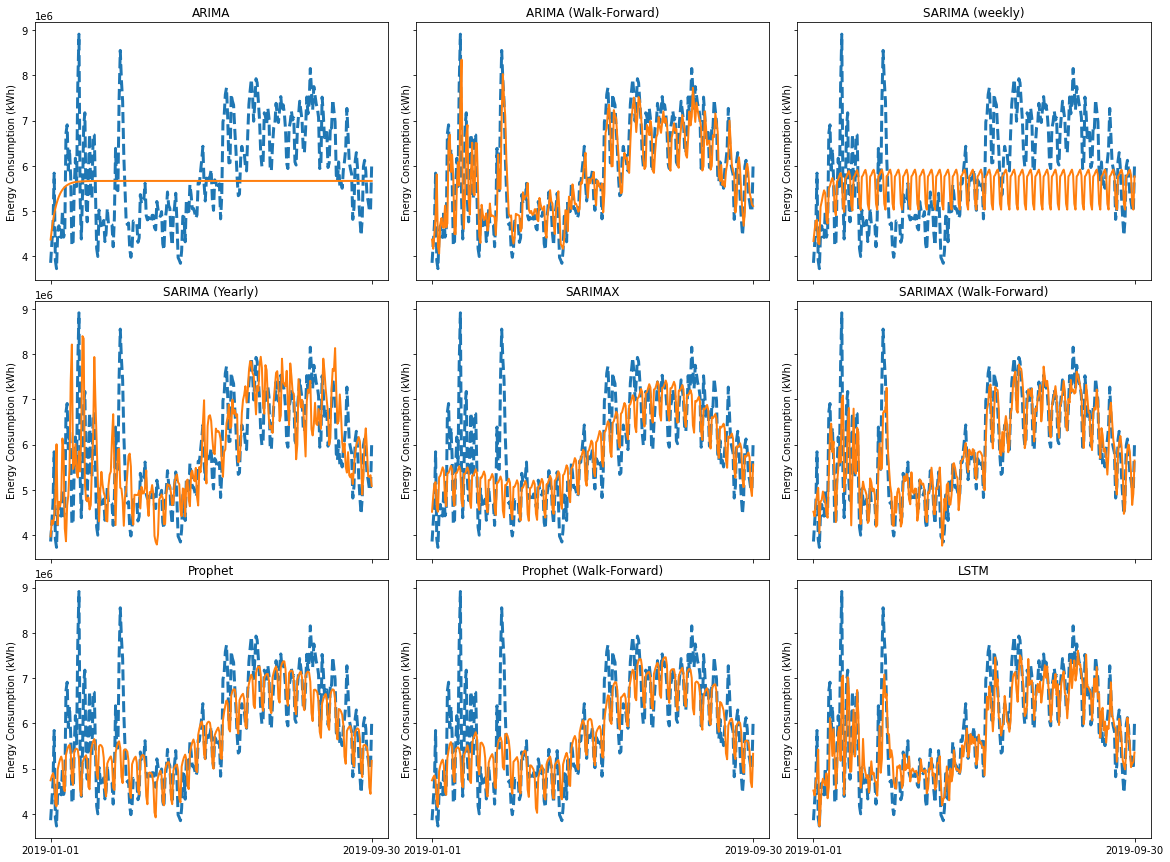

In [18]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize = (20,15))
fig.subplots_adjust(wspace=0.08)
fig.subplots_adjust(hspace=0.08)
start = results.index[0]
end = results.index[-1]

for ax, predict in zip(ax.flatten(), predictions):
    ax.plot(results['Actual'], linestyle = '--', linewidth = 3, label = 'Actual')
    ax.plot(results[predict], linewidth = 2, label = predict)
    ax.set_title(predict)
    plt.xticks([start,end])
    ax.set_ylabel('Energy Consumption (kWh)')


### Top 3 Predictors Based on Visuals

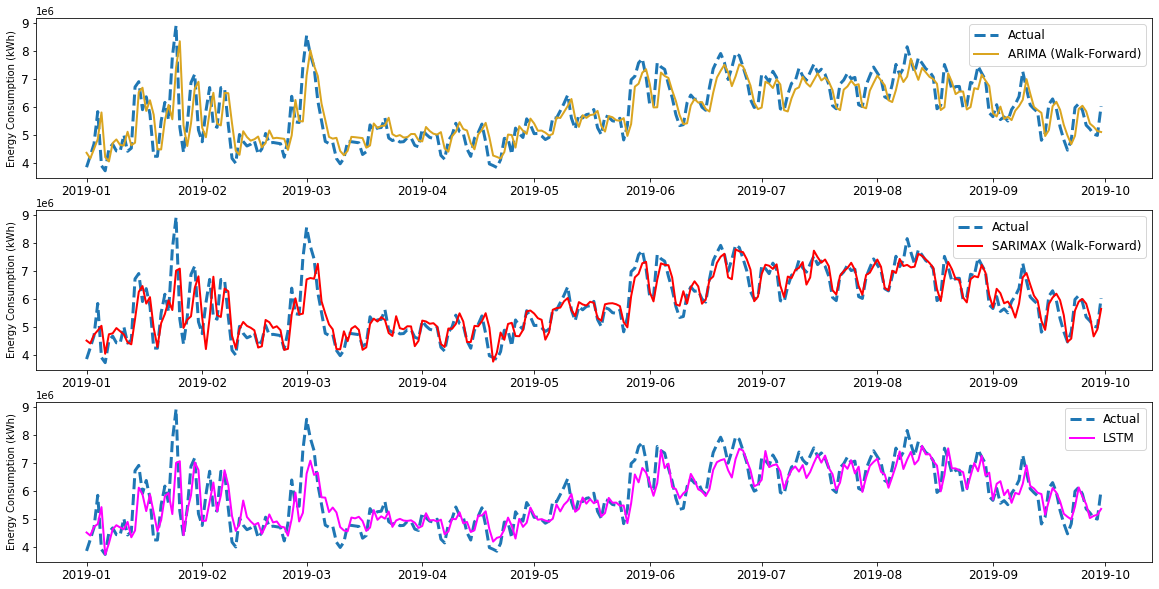

In [19]:
plt.figure(figsize=(20,10))
best = ['SARIMAX (Walk-Forward)', 'LSTM', 'ARIMA (Walk-Forward)']

plt.subplot(311)
plt.plot(results['Actual'], linestyle = '--', linewidth = 3, label = 'Actual')
plt.plot(results[best[2]], label = best[2], linewidth = 2, color = 'goldenrod')
plt.legend(fontsize = 'large')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Energy Consumption (kWh)')

plt.subplot(312)
plt.plot(results['Actual'], linestyle = '--', linewidth = 3, label = 'Actual')
plt.plot(results[best[0]], label = best[0], linewidth = 2, color = 'r')
plt.legend(fontsize = 'large')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Energy Consumption (kWh)')

plt.subplot(313)
plt.plot(results['Actual'], linestyle = '--', linewidth = 3, label = 'Actual')
plt.plot(results[best[1]], label = best[1], linewidth = 2, color = 'magenta')
plt.legend(fontsize = 'large')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Energy Consumption (kWh)')

plt.show()

### Performance of Each Model Can't Be Assessed Based on Visuals
- Mathematical metrics were used to assess the performance of each model.

In [20]:
#############################################
#         evaluation function               #
#############################################
#Evaluation metrics
from sklearn.metrics import r2_score
# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true+1.))) * 100

In [21]:
results.columns

Index(['ARIMA', 'ARIMA (Walk-Forward)', 'SARIMA (weekly)', 'SARIMA (Yearly)',
       'SARIMAX', 'SARIMAX (Walk-Forward)', 'Prophet',
       'Prophet (Walk-Forward)', 'LSTM', 'Actual'],
      dtype='object')

In [22]:
actual = results['Actual']
predict = results.drop('Actual', axis = 1)

In [23]:
table = pd.DataFrame({'Model': predict.columns})
mape_list = []
r2_list = []
rmse_list = []
mae_list = []

for column in predict.columns:
    mape = mean_absolute_percentage_error(actual, predict[column])
    r2 = r2_score(actual, predict[column])
    mape_list.append(mape)
    r2_list.append(r2)

table['MAPE (%)'] = mape_list
table['R2 Score'] = r2_list

table['Color'] = ['pink', 'orange', 'green', 'grey', 'brown', 'red', 'blue', 'indigo', 'magenta']
table

,Model,MAPE (%),R2 Score,Color
0,ARIMA,15.726673,0.008546,pink
1,ARIMA (Walk-Forward),7.940062,0.676752,orange
2,SARIMA (weekly),14.924401,0.077951,green
3,SARIMA (Yearly),12.154548,0.248447,grey
4,SARIMAX,8.648514,0.574997,brown
5,SARIMAX (Walk-Forward),6.065202,0.785567,red
6,Prophet,7.770419,0.605179,blue
7,Prophet (Walk-Forward),7.842699,0.635054,indigo
8,LSTM,7.063277,0.723021,magenta


### R2 Score

In [24]:
for_r2 = table.sort_values(by = ['R2 Score'], ascending = False)
for_r2

,Model,MAPE (%),R2 Score,Color
5,SARIMAX (Walk-Forward),6.065202,0.785567,red
8,LSTM,7.063277,0.723021,magenta
1,ARIMA (Walk-Forward),7.940062,0.676752,orange
7,Prophet (Walk-Forward),7.842699,0.635054,indigo
6,Prophet,7.770419,0.605179,blue
4,SARIMAX,8.648514,0.574997,brown
3,SARIMA (Yearly),12.154548,0.248447,grey
2,SARIMA (weekly),14.924401,0.077951,green
0,ARIMA,15.726673,0.008546,pink


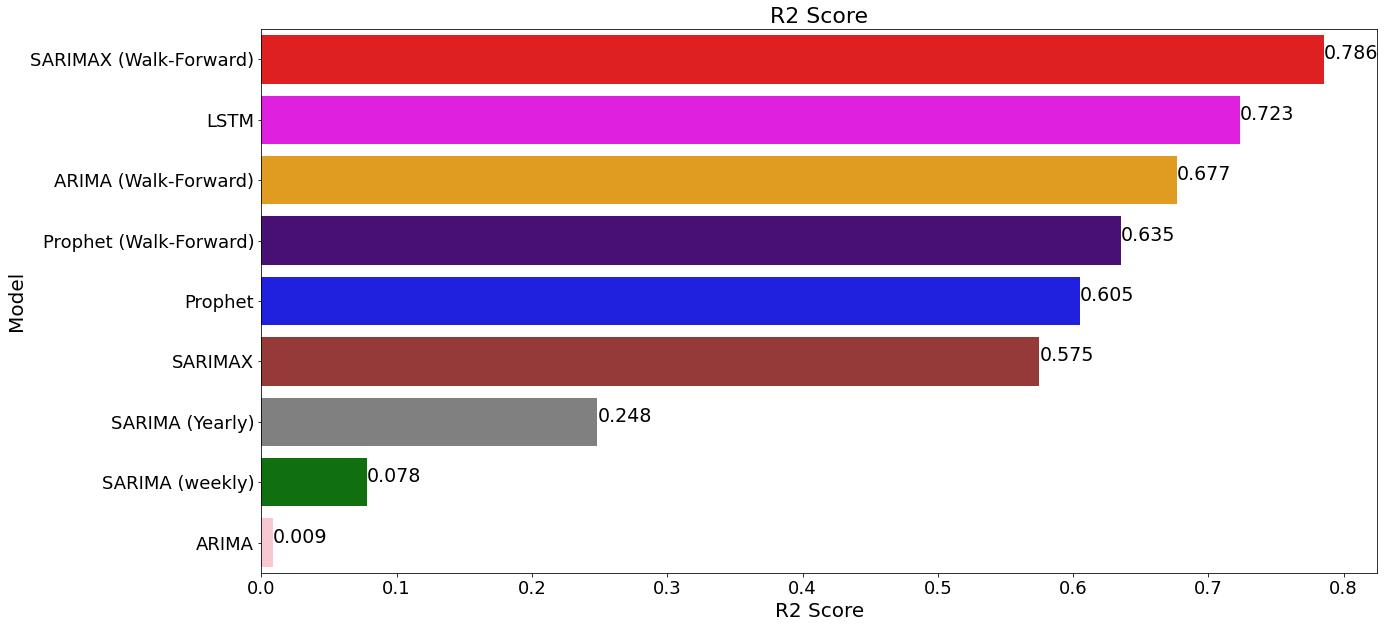

In [25]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'R2 Score', y = 'Model', palette = for_r2.Color.tolist(), data = for_r2, orient = 'h')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('Model', fontsize = 20)
plt.xlabel('R2 Score', fontsize = 20)

plt.title('R2 Score', fontsize = 22)
for index, value in enumerate(for_r2['R2 Score']):
    plt.text(value, index, str(round(value,3)), fontsize = 19)

plt.show()

Based on the bar plot, **SARIMAX (Walk - Forward)** performed the best.

### Mean Absolute Percentage Error (MAPE)

In [26]:
for_mape = table.sort_values(by = ['MAPE (%)'])
for_mape

,Model,MAPE (%),R2 Score,Color
5,SARIMAX (Walk-Forward),6.065202,0.785567,red
8,LSTM,7.063277,0.723021,magenta
6,Prophet,7.770419,0.605179,blue
7,Prophet (Walk-Forward),7.842699,0.635054,indigo
1,ARIMA (Walk-Forward),7.940062,0.676752,orange
4,SARIMAX,8.648514,0.574997,brown
3,SARIMA (Yearly),12.154548,0.248447,grey
2,SARIMA (weekly),14.924401,0.077951,green
0,ARIMA,15.726673,0.008546,pink


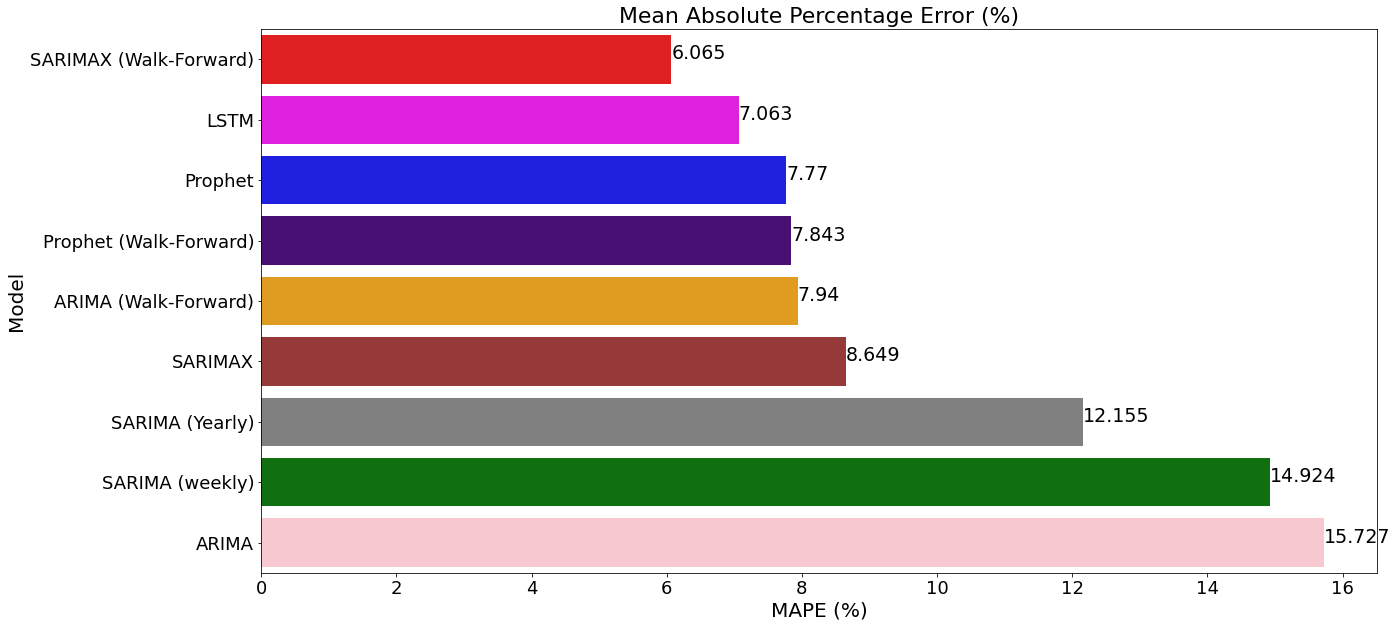

In [27]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'MAPE (%)', y = 'Model', palette = for_mape.Color.tolist(), data = for_mape, orient = 'h')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('Model', fontsize = 20)
plt.xlabel('MAPE (%)', fontsize = 20)

plt.title('Mean Absolute Percentage Error (%)', fontsize = 22)
for index, value in enumerate(for_mape['MAPE (%)']):
    plt.text(value, index, str(round(value,3)), fontsize = 19)

plt.show()

Based on the bar plot, **SARIMAX (Walk - Forward)** performed the best.

To choose the best model/s, a 2-dimensional plot is used where:
- x - label = R2 Score
- y - label = MAPE 

# Conclusion

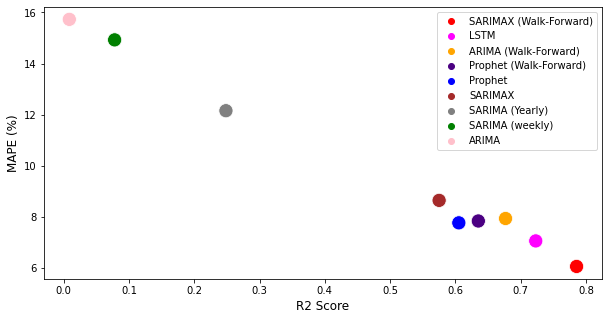

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'R2 Score', y = 'MAPE (%)', hue = for_r2.Model.tolist(), palette = for_r2.Color.tolist(), 
                s = 200, data = for_r2)
plt.xlabel('R2 Score', fontsize = 12)
plt.ylabel('MAPE (%)', fontsize = 12)
plt.show()

- **The Walk-Forward models are found to perform the best in forecasting the energy consumption for the CitiPower electrical distribution network.** 
- **Best Model for Daily Forecasting: SARIMAX (Walk-Forward)**
    - Largest R2 Score: &nbsp;        0.786
    - Smallest MAPE: &ensp;&ensp;&ensp;&ensp;          6.065%
- **For longer period of forecasting, Prophet can be a viable model** 
    - R2 Score: 0.605
    - MAPE: &nbsp;&nbsp;&nbsp;&nbsp; 7.77%

# Further Work
1. Calibrate and verify models for other distribution networks.
2. Explore models available in Amazon Web Services (AWS) and Microsoft Azure.
3. Automate process of retraining the model from sensors.